In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import albumentations as A

Примечание: Для запуска нужна картинка 'test_image.jpg' и библиотеки cv2, matplotlib.
Тестовое изображение 'test_image.jpg' загружено.


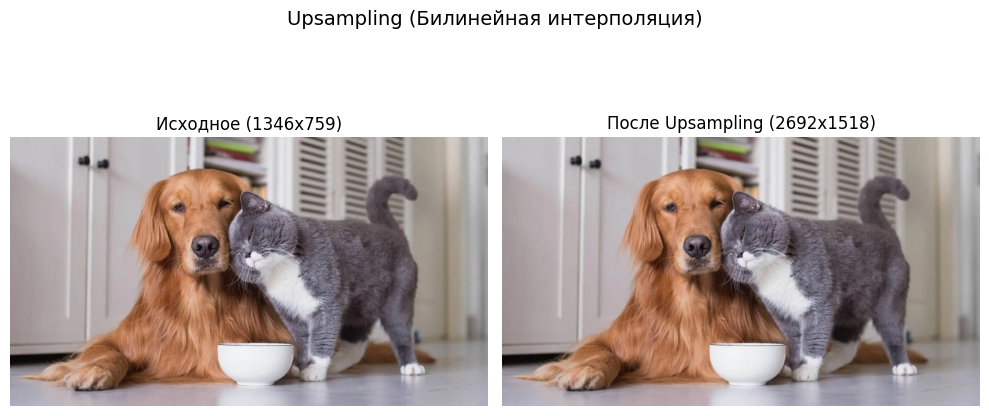

------------------------------


In [2]:
print("Примечание: Для запуска нужна картинка 'test_image.jpg' и библиотеки cv2, matplotlib.")

try:
    image_orig = cv2.imread('test_image.jpg')
    if image_orig is None:
        raise FileNotFoundError
    image_orig = cv2.cvtColor(image_orig, cv2.COLOR_BGR2RGB)
    print("Тестовое изображение 'test_image.jpg' загружено.")

    h, w, _ = image_orig.shape
    scale_factor = 2
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)

    image_upsampled = cv2.resize(image_orig, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle("Upsampling (Билинейная интерполяция)", fontsize=14)

    axs[0].imshow(image_orig)
    axs[0].set_title(f"Исходное ({w}x{h})")
    axs[0].axis('off')

    axs[1].imshow(image_upsampled)
    axs[1].set_title(f"После Upsampling ({new_w}x{new_h})")
    axs[1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except FileNotFoundError:
    print("Файл 'test_image.jpg' не найден. Пропускаю демонстрацию Upsampling.")
except Exception as e:
    print(f"Ошибка при выполнении Upsampling: {e}")

print("-" * 30)

In [3]:
try:
    image = cv2.imread('test_image.jpg')
    if image is None:
        raise FileNotFoundError
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    print("Тестовое изображение 'test_image.jpg' для аугментации загружено.")

    h, w, _ = image.shape
    mask = np.zeros((h, w), dtype=np.uint8)
    center_x, center_y = w // 2, h // 2
    radius = min(h, w) // 4
    cv2.circle(mask, (center_x, center_y), radius, 1, -1) 

except FileNotFoundError:
    print("Файл 'test_image.jpg' не найден. Создаю простое изображение и маску.")
    image = np.ones((300, 400, 3), dtype=np.uint8) * 200 
    h, w, _ = image.shape
    mask = np.zeros((h, w), dtype=np.uint8)
    cv2.rectangle(mask, (w//4, h//4), (3*w//4, 3*h//4), 1, -1) 


Тестовое изображение 'test_image.jpg' для аугментации загружено.


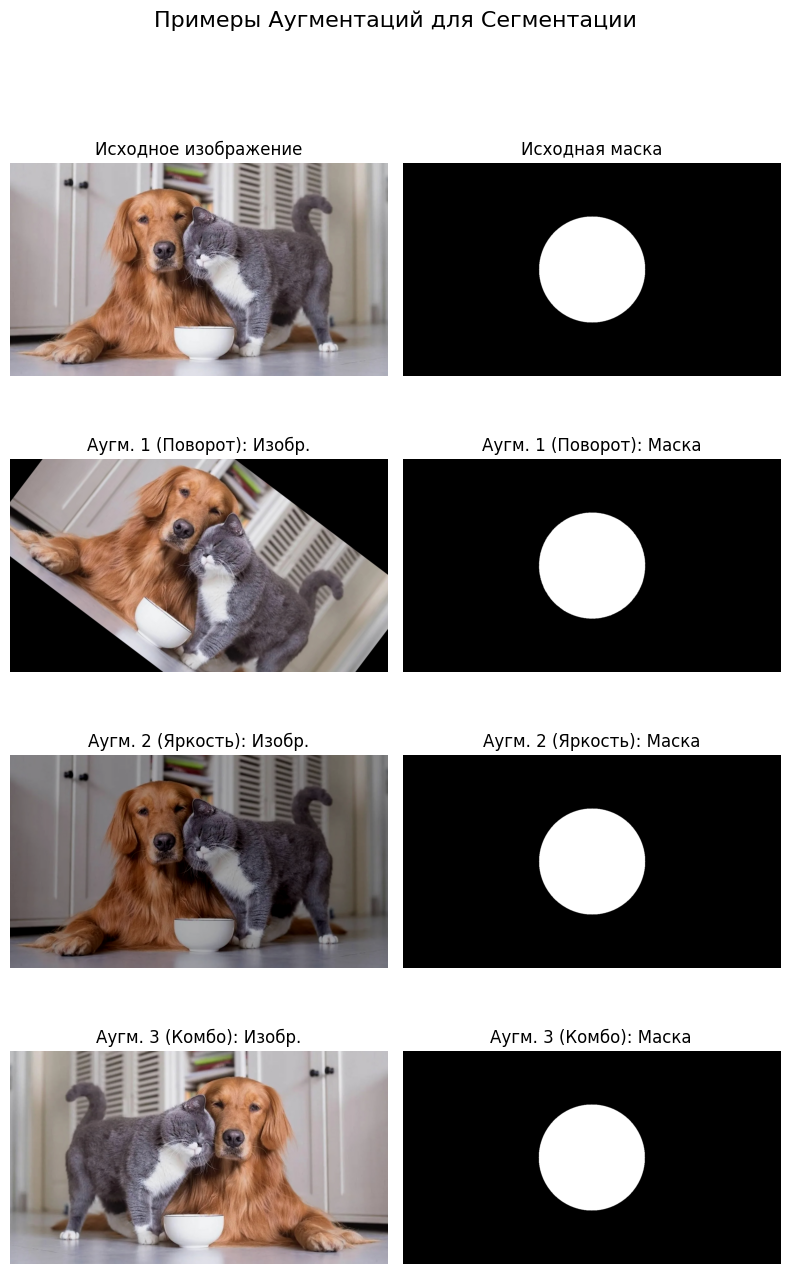


Завершение работы скрипта.


In [4]:
# Аугментация 1: Геометрическая (Поворот) - Применяется к изображению и маске
transform_geom = A.Compose([
    A.Rotate(limit=45, p=1.0, border_mode=cv2.BORDER_CONSTANT),
])

# Аугментация 2: Изменение цвета/яркости - Применяется ТОЛЬКО к изображению
transform_pixel = A.Compose([
    A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=1.0),
])

transform_combo = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.GaussNoise(p=0.5),
])


try:
    augmented_geom = transform_geom(image=image, mask=mask)
    image_aug_geom = augmented_geom['image']
    mask_aug_geom = augmented_geom['mask']

    augmented_pixel = transform_pixel(image=image, mask=mask)
    image_aug_pixel = augmented_pixel['image']
    mask_aug_pixel = augmented_pixel['mask']

    augmented_combo = transform_combo(image=image, mask=mask)
    image_aug_combo = augmented_combo['image']
    mask_aug_combo = augmented_combo['mask'] 

    # Отображение
    fig, axs = plt.subplots(4, 2, figsize=(8, 14))
    fig.suptitle("Примеры Аугментаций для Сегментации", fontsize=16)

    # Исходные
    axs[0, 0].imshow(image)
    axs[0, 0].set_title("Исходное изображение")
    axs[0, 0].axis('off')
    axs[0, 1].imshow(mask, cmap='gray')
    axs[0, 1].set_title("Исходная маска")
    axs[0, 1].axis('off')

    # Геометрическая
    axs[1, 0].imshow(image_aug_geom)
    axs[1, 0].set_title("Аугм. 1 (Поворот): Изобр.")
    axs[1, 0].axis('off')
    axs[1, 1].imshow(mask_aug_geom, cmap='gray')
    axs[1, 1].set_title("Аугм. 1 (Поворот): Маска")
    axs[1, 1].axis('off')

    # Пиксельная
    axs[2, 0].imshow(image_aug_pixel)
    axs[2, 0].set_title("Аугм. 2 (Яркость): Изобр.")
    axs[2, 0].axis('off')
    axs[2, 1].imshow(mask_aug_pixel, cmap='gray')
    axs[2, 1].set_title("Аугм. 2 (Яркость): Маска")
    axs[2, 1].axis('off')

    # Комбинированная
    axs[3, 0].imshow(image_aug_combo)
    axs[3, 0].set_title("Аугм. 3 (Комбо): Изобр.")
    axs[3, 0].axis('off')
    axs[3, 1].imshow(mask_aug_combo, cmap='gray')
    axs[3, 1].set_title("Аугм. 3 (Комбо): Маска")
    axs[3, 1].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

except Exception as e:
    print(f"\nНе удалось выполнить аугментацию или отображение: {e}")
    print("Убедитесь, что установлены 'opencv-python', 'albumentations', 'matplotlib' и есть тестовое изображение.")


print("\nЗавершение работы скрипта.")